In [56]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gym = pd.read_csv('gymdata.csv')

In [4]:
gym.head()

,DateTime,Weather,FreeWeight,FreeWeight_PT,RunningMachine,Cycle,PowerRack,PowerRack_PT,SmithMachine,PowerLegPress,...,ShoulderPressMachine,ChestFlyMachine,ChestPressMachine,SeatedRowMachine,LatPullDown,LatPullDown_PT,SitUpBench,SitUpBench_PT,BackExtensionMachine,AssistedPullUpMachine
0,2022-08-17 05:00:49,SUNNY,0,1,2,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2022-08-17 05:05:33,SUNNY,0,1,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-08-17 05:10:26,SUNNY,0,0,1,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-08-17 05:15:07,SUNNY,0,1,1,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-08-17 05:20:08,SUNNY,1,0,2,2,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   DateTime               912 non-null    object
 1   Weather                912 non-null    object
 2   FreeWeight             912 non-null    int64 
 3   FreeWeight_PT          912 non-null    int64 
 4   RunningMachine         912 non-null    int64 
 5   Cycle                  912 non-null    int64 
 6   PowerRack              912 non-null    int64 
 7   PowerRack_PT           912 non-null    int64 
 8   SmithMachine           912 non-null    int64 
 9   PowerLegPress          912 non-null    int64 
 10  FlatBench              912 non-null    int64 
 11  InclineBench           912 non-null    int64 
 12  Cable                  912 non-null    int64 
 13  Cable_PT               912 non-null    int64 
 14  HipExtensionMachine    912 non-null    int64 
 15  LegPressMachine        

2022-08-17 부터 2022-10-28 까지

토요일 및 공휴일 제외 평일만 (48일)



In [6]:
gym.shape

(912, 29)

프리 웨이트 공간 (2군데)

런닝머신 20개

사이클 8개

파워렉 3개

케이블 2개

랫풀다운 2개

싯업벤치 2개

외 1개씩

In [7]:
gym.columns

Index(['DateTime', 'Weather', 'FreeWeight', 'FreeWeight_PT', 'RunningMachine',
       'Cycle', 'PowerRack', 'PowerRack_PT', 'SmithMachine', 'PowerLegPress',
       'FlatBench', 'InclineBench', 'Cable', 'Cable_PT', 'HipExtensionMachine',
       'LegPressMachine', 'InnerThighMachine', 'LegExtension', 'LegCurl',
       'ShoulderPressMachine', 'ChestFlyMachine', 'ChestPressMachine',
       'SeatedRowMachine', 'LatPullDown', 'LatPullDown_PT', 'SitUpBench',
       'SitUpBench_PT', 'BackExtensionMachine', 'AssistedPullUpMachine'],
      dtype='object')

## 데이터 전처리

In [24]:
total_equipments = ['FreeWeight', 'FreeWeight_PT', 'RunningMachine',
       'Cycle', 'PowerRack', 'PowerRack_PT', 'SmithMachine', 'PowerLegPress',
       'FlatBench', 'InclineBench', 'Cable', 'Cable_PT', 'HipExtensionMachine',
       'LegPressMachine', 'InnerThighMachine', 'LegExtension', 'LegCurl',
       'ShoulderPressMachine', 'ChestFlyMachine', 'ChestPressMachine',
       'SeatedRowMachine', 'LatPullDown', 'LatPullDown_PT', 'SitUpBench',
       'SitUpBench_PT', 'BackExtensionMachine', 'AssistedPullUpMachine']

In [31]:
# 날짜 변환
gym['DateTime'] = pd.to_datetime(gym['DateTime'])
# 하루 19건 순서대로 인덱스 지정
gym['idx'] = list(range(19))*48
# 요일
gym['dayOfWeek'] = gym['DateTime'].dt.day_name()

# 총 인원
gym['total'] = gym.loc[:,total_equipments].sum(axis=1)
# 프리웨이트존 총 인원
gym['TotalFreeWeight'] = gym['FreeWeight']+gym['FreeWeight_PT']

# 기구 사용률
gym['USE_RunningMachine'] = round(gym['RunningMachine']/20, 3)
gym['USE_PowerRack'] = round((gym['PowerRack']+gym['PowerRack_PT'])/3, 3)
gym['USE_Cable'] = round((gym['Cable']+gym['Cable_PT'])/2, 3)
gym['USE_LatPullDown'] = round((gym['LatPullDown']+gym['LatPullDown_PT'])/2, 3)
gym['USE_SitUpBench'] = round((gym['SitUpBench']+gym['SitUpBench_PT'])/2, 3)
gym['USE_Cycle'] = round(gym['Cycle']/8, 3)

In [41]:
df = gym[['DateTime','idx','dayOfWeek','total','TotalFreeWeight','USE_RunningMachine','USE_Cycle','USE_PowerRack',
       'USE_Cable', 'USE_LatPullDown', 'USE_SitUpBench', 'SmithMachine', 'PowerLegPress',
       'FlatBench', 'InclineBench', 'HipExtensionMachine',
       'LegPressMachine', 'InnerThighMachine', 'LegExtension', 'LegCurl',
       'ShoulderPressMachine', 'ChestFlyMachine', 'ChestPressMachine',
       'SeatedRowMachine', 'BackExtensionMachine', 'AssistedPullUpMachine']]

In [45]:
df.columns = ['날짜', 'idx', '요일', '총 인원', '프리웨이트존',
       '런닝머신', '사이클', '파워렉', '케이블',
       '랫풀다운', '싯업벤치', '스미스머신', '파워레그프레스',
       '플랫벤치', '인클라인벤치', '힙익스텐션머신', '레그프레스머신',
       '이너싸이머신', '레그익스텐션', '레그컬', '숄더프레스머신',
       '체스트플라이머신', '체스트프레스머신', '시티드로우머신',
       '백익스텐션', '어시스트풀업머신']

In [48]:
equipments = ['런닝머신', '사이클', '파워렉', '케이블',
       '랫풀다운', '싯업벤치', '스미스머신', '파워레그프레스',
       '플랫벤치', '인클라인벤치', '힙익스텐션머신', '레그프레스머신',
       '이너싸이머신', '레그익스텐션', '레그컬', '숄더프레스머신',
       '체스트플라이머신', '체스트프레스머신', '시티드로우머신',
       '백익스텐션', '어시스트풀업머신']

In [47]:
df.head()

,날짜,idx,요일,총 인원,프리웨이트존,런닝머신,사이클,파워렉,케이블,랫풀다운,...,레그프레스머신,이너싸이머신,레그익스텐션,레그컬,숄더프레스머신,체스트플라이머신,체스트프레스머신,시티드로우머신,백익스텐션,어시스트풀업머신
0,2022-08-17 05:00:49,0,Wednesday,6,1,0.10,0.125,0.333,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2022-08-17 05:05:33,1,Wednesday,5,1,0.10,0.125,0.333,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2022-08-17 05:10:26,2,Wednesday,5,0,0.05,0.250,0.333,0.5,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2022-08-17 05:15:07,3,Wednesday,7,1,0.05,0.250,0.333,0.5,0.0,...,0,1,0,0,0,0,0,0,0,0
4,2022-08-17 05:20:08,4,Wednesday,8,1,0.10,0.250,0.333,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


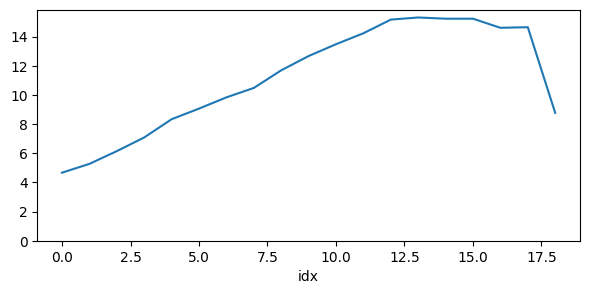

In [72]:
fig, ax= plt.subplots(figsize=(7,3))
df.groupby('idx')['총 인원'].mean().plot(ax=ax)

ax.set_ylim(0,)

# xticks = ['0500','0505','0510','0515','0520','0525','0530','0535','0540','0545','0550','0555','0600','0605','0610','0615','0620','0625','0630']
# ax.set_xticks(xticks)
# ax.get_xticklabels()
# ax.set_xticklabels(xticks, rotation=45)
plt.show()